# Neurons selected by gradient magnitude

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
from pathlib import Path

In [2]:
model_params = (1, 1, 8, 2, 2)
num_kept_neurons = 2
lr=0.005
runs=50

#0: loss: 0.03126329556107521 - size: 209
#1: loss: 0.03834645450115204 - size: 209
#2: loss: 0.04600144550204277 - size: 209
#3: loss: 0.03203723952174187 - size: 209
#4: loss: 0.07472191751003265 - size: 209
#5: loss: 0.031665243208408356 - size: 209
#6: loss: 0.04421190172433853 - size: 209
#7: loss: 0.07344887405633926 - size: 209
#8: loss: 0.05217565968632698 - size: 209
#9: loss: 0.030455291271209717 - size: 209
#10: loss: 0.054485902190208435 - size: 209
#11: loss: 0.03315083682537079 - size: 209
#12: loss: 0.031685132533311844 - size: 209
#13: loss: 0.03657850623130798 - size: 209
#14: loss: 0.04120630770921707 - size: 209
#15: loss: 0.042708877474069595 - size: 209
#16: loss: 0.032368388026952744 - size: 209
#17: loss: 0.0813220888376236 - size: 209
#18: loss: 0.07671120762825012 - size: 209
#19: loss: 0.030652709305286407 - size: 209
#20: loss: 0.05304960161447525 - size: 209
#21: loss: 0.048345595598220825 - size: 209
#22: loss: 0.032301340252161026 - size: 209
#23: loss: 0.

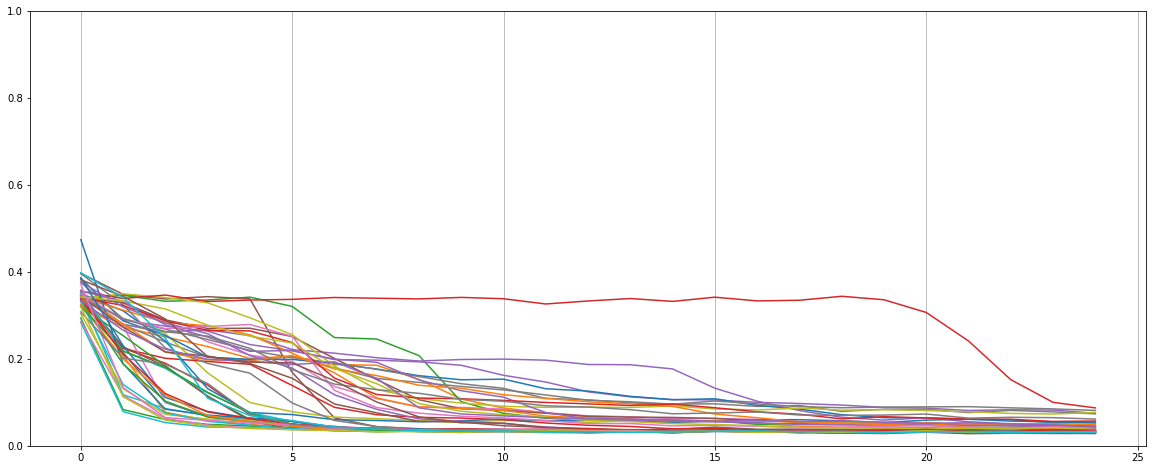

In [3]:
criterion = torch.nn.MSELoss()

def grow(model):
    model.grow(num_novel=4)
    
    with model.new_grad_only():
        model.zero_grad()
        
        for _ in range(200): # batches
            train_x, train_y = toy_data()
            y = model(train_x)
            loss = criterion(y, train_y)

            loss.backward()

        selected = model.select(num_kept_neurons)

    model.degrow(*selected)

series = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

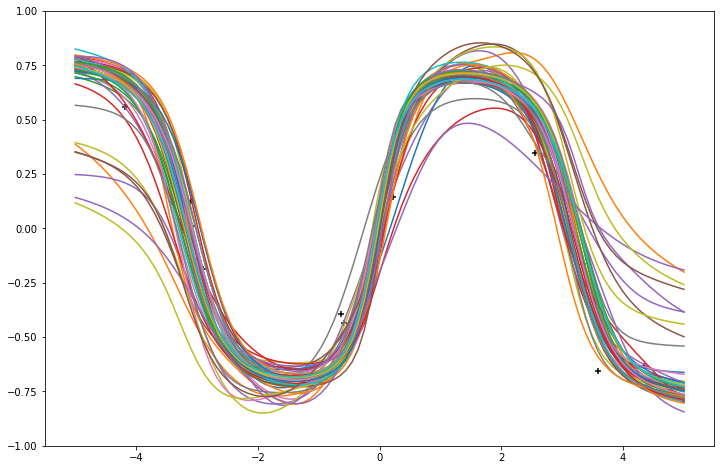

In [4]:
eval_series(series)

In [5]:
d = Path("results")
d.mkdir(parents=True, exist_ok=True)

torch.save(series, d / 'firefly_random.pt')